### The behaviour of charged particles (ions) during new particle formation events in urban Leipzig (Germany)
https://doi.org/10.5194/egusphere-2024-742 

The aim of this paper was to better understand the behaviour of charged particles and their behaviour during atmospheric NPF in an urban environment.

The air ion/charged particle population was mobility classified into small (0.8–1.6 nm), intermediate (1.6–7.5 nm), and large particles (7.5–22 nm) for analysis, following the classification system outlined by Tammet (2006).

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/home/coliewo/Desktop/analysis/combined_test1.nc'
data = xr.open_dataset(file_path)

#To convert the diameter values to nm
dataset = data.assign_coords(diameter=data['diameter'] * 1e9)

In [2]:
neg_ions = dataset.neg_ions
pos_ions = dataset.pos_ions

#### Be careful overwritting variable outputs...

In [3]:
# Divide the data into the small, large, and intermediate particles
small_neg_ions = neg_ions.sel(diameter=slice(0.8,1.6))
small_pos_ions = pos_ions.sel(diameter=slice(0.8,1.6))
intermediate_neg_ions = neg_ions.sel(diameter=slice(1.6,7.5))
intermediate_pos_ions = pos_ions.sel(diameter=slice(1.6,7.5))
large_neg_ions = neg_ions.sel(diameter=slice(7.5,22.0))
large_pos_ions = pos_ions.sel(diameter=slice(7.5,22.0))     

In [4]:
# Mean over each diameter range
small_neg_i = small_neg_ions.mean(dim='diameter')
small_pos_i = small_pos_ions.mean(dim='diameter')
intermediate_neg_i = intermediate_neg_ions.mean(dim='diameter')
intermediate_pos_i = intermediate_pos_ions.mean(dim='diameter')
large_neg_i = large_neg_ions.mean(dim='diameter')
large_pos_i = large_pos_ions.mean(dim='diameter')

In [5]:
small_neg_i

<xarray.DataArray 'neg_ions' (time: 1081)>
array([          nan,           nan,           nan, ...,  891.41525994,
        910.23677543, 1375.60957566])
Coordinates:
  * time     (time) datetime64[ns] 2024-05-16 2024-05-16T01:00:00 ... 2024-06-30

In [6]:
#Diurnal cycles
small_neg_ions_diurnal_variation = small_neg_i.groupby(small_neg_i.time.dt.hour).mean(dim='time')
small_pos_ions_diurnal_variation = small_pos_i.groupby(small_pos_i.time.dt.hour).mean(dim='time')
intermediate_neg_ions_diurnal_variation = intermediate_neg_i.groupby(intermediate_neg_i.time.dt.hour).mean(dim='time')
intermediate_pos_ions_diurnal_variation = intermediate_pos_i.groupby(intermediate_pos_i.time.dt.hour).mean(dim='time')
large_neg_ions_diurnal_variation = large_neg_i.groupby(large_neg_i.time.dt.hour).mean(dim='time')
large_pos_ions_diurnal_variation = large_pos_i.groupby(large_pos_i.time.dt.hour).mean(dim='time')


In [7]:
small_neg_ions_diurnal_variation

<xarray.DataArray 'neg_ions' (hour: 24)>
array([1051.02431666, 1063.52821825, 1113.34851996, 1074.70670934,
       1044.54715617,  975.9223656 ,  904.92192732,  723.82549725,
        656.19143197,  596.31851947,  594.79731303,  602.53085634,
        647.34274411,  680.20264027,  740.26514832,  718.79580451,
        775.83341434,  776.68592383,  772.52103215,  790.45460343,
        807.75168665,  849.77515373,  936.25125438, 1000.77680871])
Coordinates:
  * hour     (hour) int64 0 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21 22 23

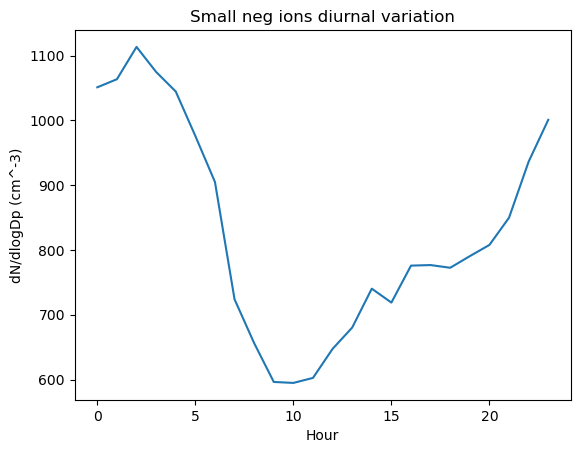

In [8]:
#plot
plt.plot(small_neg_ions_diurnal_variation['hour'], small_neg_ions_diurnal_variation.values) 

plt.xlabel('Hour') 
plt.ylabel('dN/dlogDp (cm^-3)')
plt.title('Small neg ions diurnal variation')

plt.show()

In [9]:
#standard error of the mean (SEM)
small_neg_ions_SEM = small_neg_i.groupby(small_neg_i.time.dt.hour).std(dim='time') / np.sqrt(45)
small_pos_ions_SEM = small_pos_i.groupby(small_pos_i.time.dt.hour).std(dim='time') / np.sqrt(45)
intermediate_neg_ions_SEM = intermediate_neg_i.groupby(intermediate_neg_i.time.dt.hour).std(dim='time') / np.sqrt(45)
intermediate_pos_ions_SEM = intermediate_pos_i.groupby(intermediate_pos_i.time.dt.hour).std(dim='time') / np.sqrt(45)
large_neg_ions_SEM = large_neg_i.groupby(large_neg_i.time.dt.hour).std(dim='time') / np.sqrt(45)
large_pos_ions_SEM = large_pos_i.groupby(large_pos_i.time.dt.hour).std(dim='time') / np.sqrt(45)


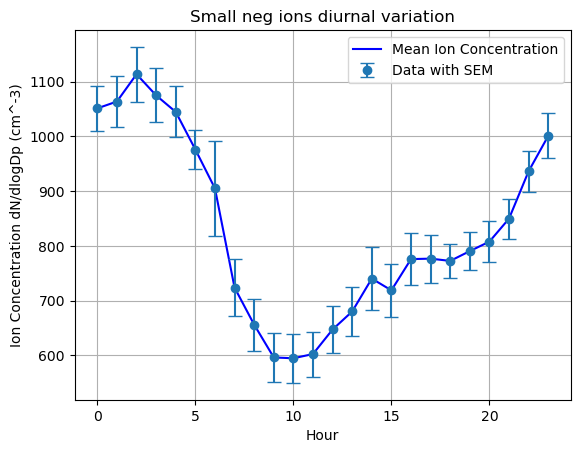

In [10]:
# Plot data
plt.plot(small_neg_ions_diurnal_variation['hour'], small_neg_ions_diurnal_variation.values, label='Mean Ion Concentration', color='blue')
plt.errorbar(small_neg_ions_diurnal_variation['hour'], small_neg_ions_diurnal_variation.values, yerr=small_neg_ions_SEM.values, fmt='o', capsize=5, label='Data with SEM')

plt.xlabel('Hour') 
plt.ylabel('Ion Concentration dN/dlogDp (cm^-3)')
plt.title('Small neg ions diurnal variation')

plt.legend()
plt.grid(True)
plt.show()

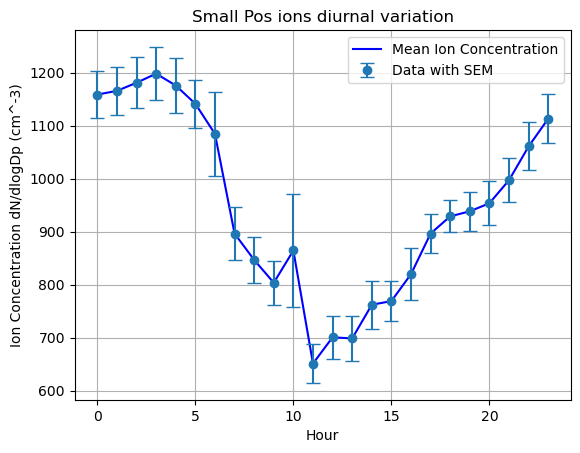

In [11]:
# Plot data
plt.plot(small_pos_ions_diurnal_variation['hour'], small_pos_ions_diurnal_variation.values, label='Mean Ion Concentration', color='blue')
plt.errorbar(small_pos_ions_diurnal_variation['hour'], small_pos_ions_diurnal_variation.values, yerr=small_pos_ions_SEM.values, fmt='o', capsize=5, label='Data with SEM')

plt.xlabel('Hour') 
plt.ylabel('Ion Concentration dN/dlogDp (cm^-3)')
plt.title('Small Pos ions diurnal variation')

plt.legend()
plt.grid(True)
plt.show()

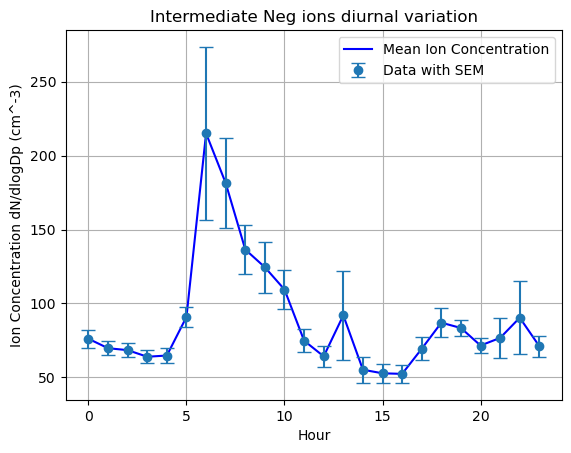

In [12]:
# Plot data
plt.plot(intermediate_neg_ions_diurnal_variation['hour'], intermediate_neg_ions_diurnal_variation.values, label='Mean Ion Concentration', color='blue')
plt.errorbar(intermediate_neg_ions_diurnal_variation['hour'], intermediate_neg_ions_diurnal_variation.values, yerr=intermediate_neg_ions_SEM.values, fmt='o', capsize=5, label='Data with SEM')

plt.xlabel('Hour') 
plt.ylabel('Ion Concentration dN/dlogDp (cm^-3)')
plt.title('Intermediate Neg ions diurnal variation')

plt.legend()
plt.grid(True)
plt.show()

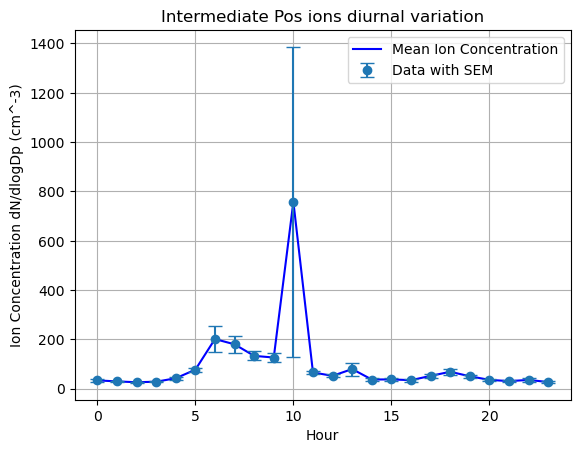

In [13]:
# Plot data
plt.plot(intermediate_pos_ions_diurnal_variation['hour'], intermediate_pos_ions_diurnal_variation.values, label='Mean Ion Concentration', color='blue')
plt.errorbar(intermediate_pos_ions_diurnal_variation['hour'], intermediate_pos_ions_diurnal_variation.values, yerr=intermediate_pos_ions_SEM.values, fmt='o', capsize=5, label='Data with SEM')

plt.xlabel('Hour') 
plt.ylabel('Ion Concentration dN/dlogDp (cm^-3)')
plt.title('Intermediate Pos ions diurnal variation')

plt.legend()
plt.grid(True)
plt.show()

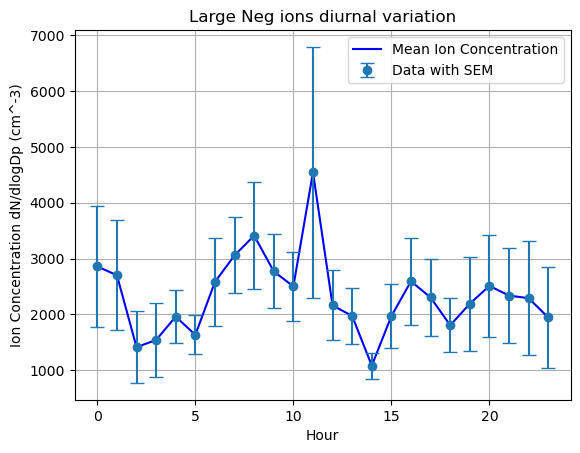

In [14]:
# Plot data
plt.plot(large_neg_ions_diurnal_variation['hour'], large_neg_ions_diurnal_variation.values, label='Mean Ion Concentration', color='blue')
plt.errorbar(large_neg_ions_diurnal_variation['hour'], large_neg_ions_diurnal_variation.values, yerr=large_neg_ions_SEM.values, fmt='o', capsize=5, label='Data with SEM')

plt.xlabel('Hour') 
plt.ylabel('Ion Concentration dN/dlogDp (cm^-3)')
plt.title('Large Neg ions diurnal variation')

plt.legend()
plt.grid(True)
plt.show()

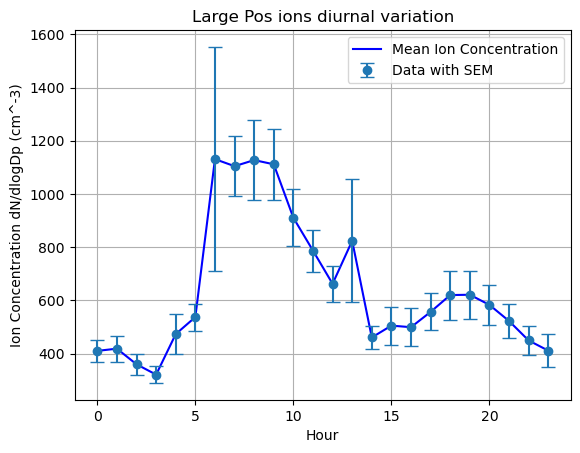

In [15]:
# Plot data
plt.plot(large_pos_ions_diurnal_variation['hour'], large_pos_ions_diurnal_variation.values, label='Mean Ion Concentration', color='blue')
plt.errorbar(large_pos_ions_diurnal_variation['hour'], large_pos_ions_diurnal_variation.values, yerr=large_pos_ions_SEM.values, fmt='o', capsize=5, label='Data with SEM')

plt.xlabel('Hour') 
plt.ylabel('Ion Concentration dN/dlogDp (cm^-3)')
plt.title('Large Pos ions diurnal variation')

plt.legend()
plt.grid(True)
plt.show()

# to prevent overlapping of plot elements.Use plt.tight_layout()

#### Meteorological variables

In [16]:
met = pd.read_csv('/home/coliewo/Desktop/data/meteo/met_may_jun24.txt')  
#new column for datetime
met['Date'] = pd.to_datetime(met['#date'] + ' ' + met['time'])
# Set datetime as index
met.set_index('Date', inplace=True)

In [17]:
# Descriptive Statistics to identify any outliers in the data??
met.describe()

,day_dec,WD_min[Deg],WD_ave[Deg],WD_max[Deg],WS_min[m/s],WS_ave[m/s],WS_max[m/s],T_air[C],T_internal[C],RH[%%],...,Rain_intensity[mm/h],Hail_acc[hits/cm2],Hail_duration[s],Hail_intensity[hits/cm2],Rain_peak_int[mm/h],Hail_peak_int[hits/cm2],T_heat[C],V_heat[V],Vsupply[V],Vref3.5[V]
count,87480.000000,87312.000000,87312.000000,87312.000000,87312.000000,87312.000000,87312.000000,87312.000000,87312.000000,87312.000000,...,87480.000000,87480.000000,87478.000000,87478.000000,87478.000000,87478.000000,87478.000000,87478.0,87478.000000,87478.000000
mean,151.526396,185.820105,184.391158,185.135239,0.683900,1.745050,2.872162,21.439657,22.102361,55.095889,...,0.087490,0.000080,0.000457,0.000046,74.132740,0.867430,22.666536,0.0,9.654152,3.500886
std,17.622732,94.547636,89.372954,91.027029,0.507532,0.945312,1.495695,4.674831,5.077917,15.270463,...,1.104268,0.016735,0.067620,0.006762,29.859702,0.991173,6.201667,0.0,0.065663,0.004000
min,121.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,9.300000,9.500000,23.000000,...,0.000000,0.000000,0.000000,0.000000,32.900000,0.000000,8.100000,0.0,9.400000,3.492000
25%,136.269271,105.000000,90.600000,100.000000,0.300000,1.000000,1.800000,17.900000,18.100000,42.800000,...,0.000000,0.000000,0.000000,0.000000,44.700000,0.000000,17.600000,0.0,9.600000,3.498000
50%,151.546180,197.000000,198.300000,202.000000,0.600000,1.600000,2.700000,21.000000,21.600000,53.800000,...,0.000000,0.000000,0.000000,0.000000,66.400000,0.000000,22.000000,0.0,9.700000,3.500000
75%,166.806423,252.000000,235.800000,239.000000,0.900000,2.300000,3.700000,24.600000,25.600000,67.400000,...,0.000000,0.000000,0.000000,0.000000,106.300000,2.000000,27.200000,0.0,9.700000,3.506000
max,181.999306,359.000000,360.000000,359.000000,4.800000,8.100000,15.700000,35.600000,37.300000,87.400000,...,94.300000,3.500000,10.000000,1.000000,106.300000,2.000000,40.500000,0.0,9.800000,3.511000


In [18]:
#Keep only relevant data?
# Create a second DataFrame with fewer columns
columns_to_keep = ['T_air[C]', 'RH[%%]', 'Rain_acc[mm]', 'WD_ave[Deg]', 'WS_ave[m/s]']
met2 = met[columns_to_keep]

In [19]:
# Convert Mean over each diameter range to a pandas DataFrame
small_neg_i = small_neg_i.to_dataframe().reset_index()
small_neg_i['time'] = pd.to_datetime(small_neg_i['time'])
small_neg_i_df = small_neg_i.set_index('time')

In [20]:
# Convert Mean over each diameter range to a pandas DataFrame
small_pos_i = small_pos_i.to_dataframe().reset_index()
small_pos_i['time'] = pd.to_datetime(small_pos_i['time'])
small_pos_i_df = small_pos_i.set_index('time')

In [21]:
# Convert Mean over each diameter range to a pandas DataFrame
intermediate_neg_i = intermediate_neg_i.to_dataframe().reset_index()
intermediate_neg_i['time'] = pd.to_datetime(intermediate_neg_i['time'])
intermediate_neg_i_df = intermediate_neg_i.set_index('time')

In [22]:
# Convert Mean over each diameter range to a pandas DataFrame
intermediate_pos_i = intermediate_pos_i.to_dataframe().reset_index()
intermediate_pos_i['time'] = pd.to_datetime(intermediate_pos_i['time'])
intermediate_pos_i_df = intermediate_pos_i.set_index('time')

In [23]:
# Convert Mean over each diameter range to a pandas DataFrame
large_neg_i = large_neg_i.to_dataframe().reset_index()
large_neg_i['time'] = pd.to_datetime(large_neg_i['time'])
large_neg_i_df = large_neg_i.set_index('time')

In [24]:
# Convert Mean over each diameter range to a pandas DataFrame
large_pos_i = large_pos_i.to_dataframe().reset_index()
large_pos_i['time'] = pd.to_datetime(large_pos_i['time'])
large_pos_i_df = large_pos_i.set_index('time')

In [25]:
# Merge the two datasets on the time index
merged_small_neg_df = pd.merge(small_neg_i_df, met2, left_index=True, right_index=True, how='inner')
merged_small_pos_df = pd.merge(small_pos_i_df, met2, left_index=True, right_index=True, how='inner')
merged_intermediate_neg_df = pd.merge(intermediate_neg_i_df, met2, left_index=True, right_index=True, how='inner')
merged_intermediate_pos_df = pd.merge(intermediate_pos_i_df, met2, left_index=True, right_index=True, how='inner')
merged_large_neg_df = pd.merge(large_neg_i_df, met2, left_index=True, right_index=True, how='inner')
merged_large_pos_df = pd.merge(large_pos_i_df, met2, left_index=True, right_index=True, how='inner')

In [26]:
merge = pd.merge(small_neg_i_df,small_pos_i_df, left_index=True, right_index=True, how='inner')

In [27]:
merge = pd.merge(merge, intermediate_neg_i_df,left_index=True, right_index=True, how='inner')

In [28]:
merge = pd.merge(merge, intermediate_pos_i_df,left_index=True, right_index=True, how='inner')

In [29]:
merge = pd.merge(merge, large_neg_i_df,left_index=True, right_index=True, how='inner')

In [30]:
merge = pd.merge(merge, large_pos_i_df,left_index=True, right_index=True, how='inner')

In [31]:
merge = pd.merge(merge, met2,left_index=True, right_index=True, how='inner')

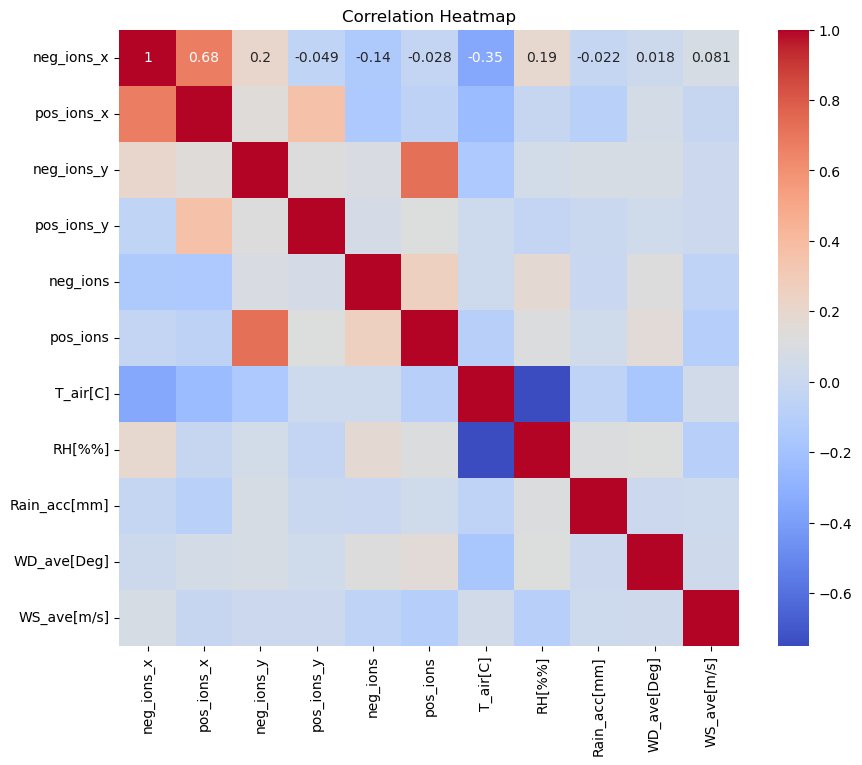

In [32]:
# Correlation Heatmap
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(merge.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#### Manually identify NPF events
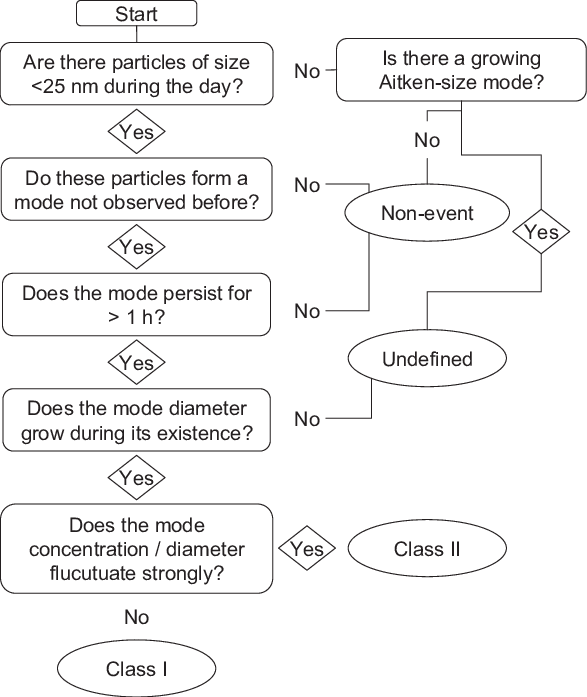

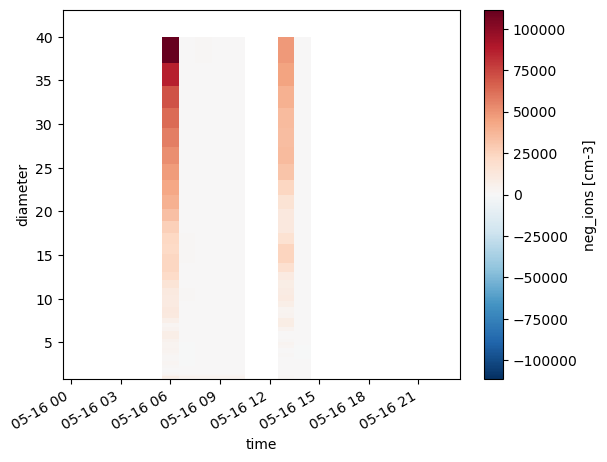

In [33]:
neg_ions.sel(time='2024-05-16').T.plot()

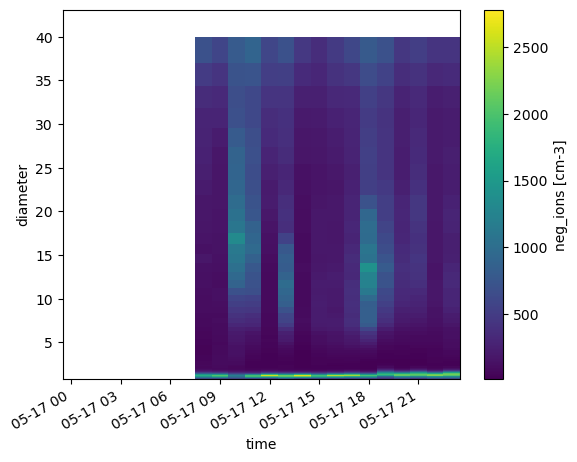

In [34]:
neg_ions.sel(time='2024-05-17').T.plot()

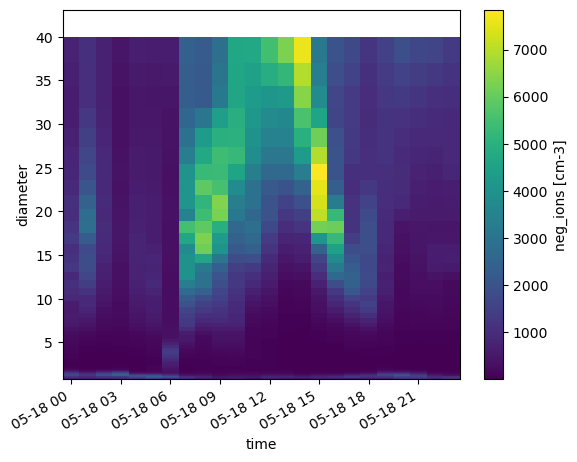

In [35]:
neg_ions.sel(time='2024-05-18').T.plot()

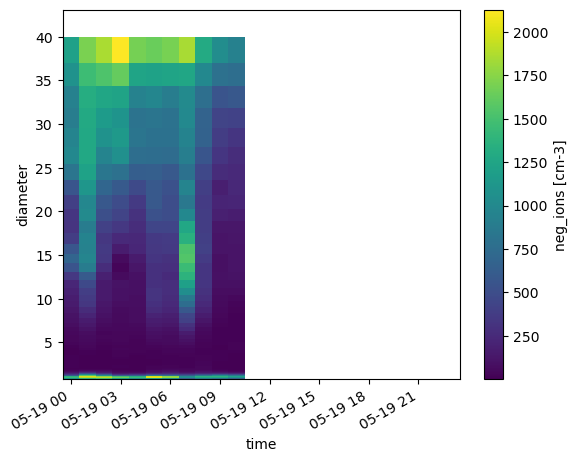

In [36]:
neg_ions.sel(time='2024-05-19').T.plot()

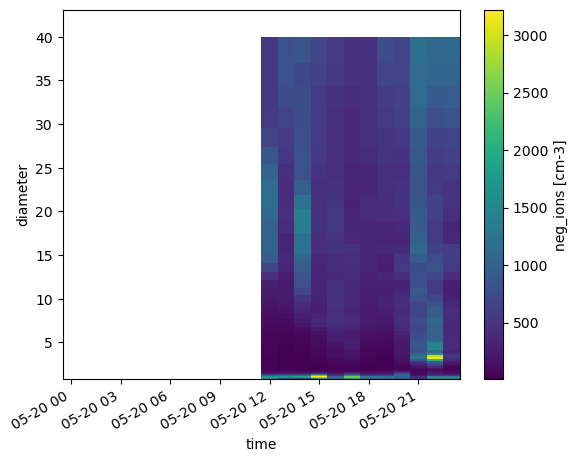

In [37]:
neg_ions.sel(time='2024-05-20').T.plot()

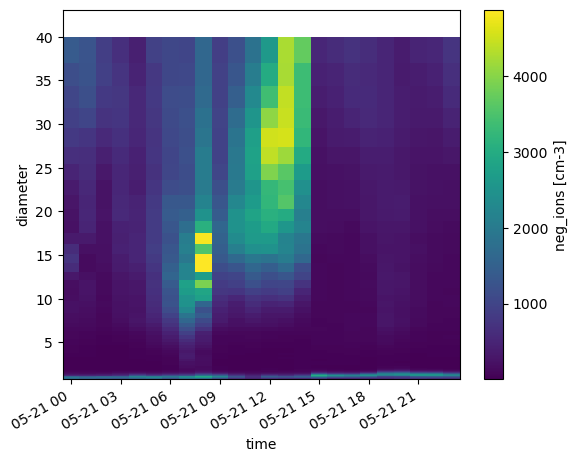

In [38]:
neg_ions.sel(time='2024-05-21').T.plot()

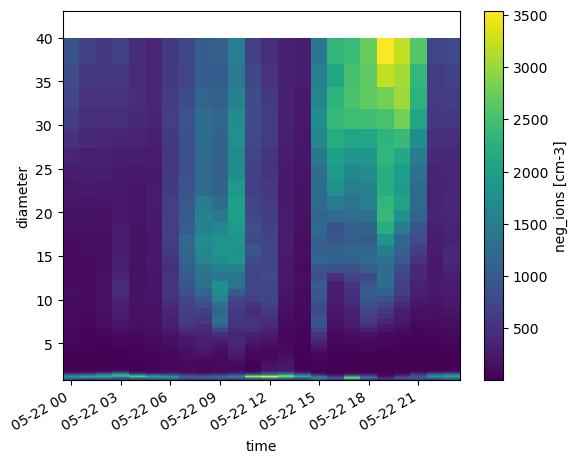

In [39]:
neg_ions.sel(time='2024-05-22').T.plot()

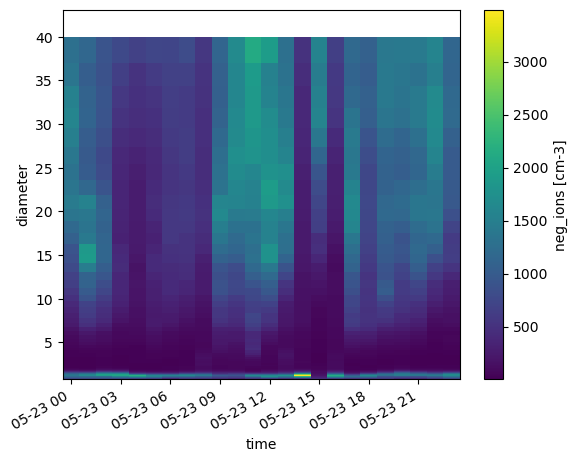

In [40]:
neg_ions.sel(time='2024-05-23').T.plot()

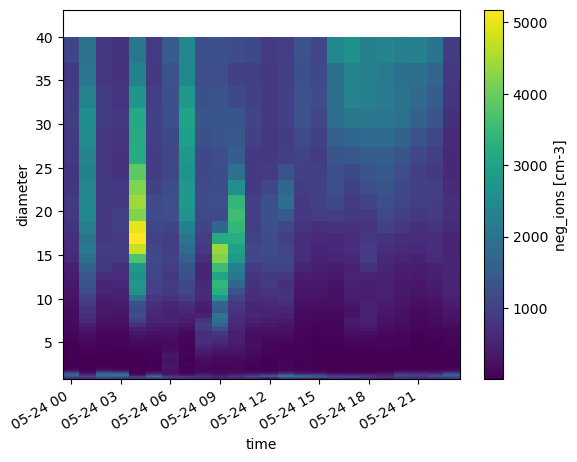

In [41]:
neg_ions.sel(time='2024-05-24').T.plot()

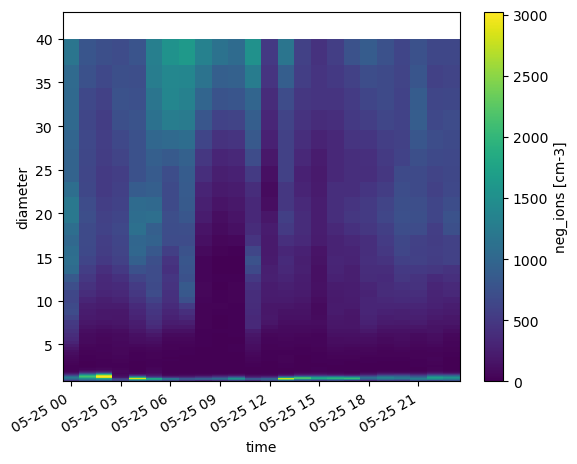

In [42]:
neg_ions.sel(time='2024-05-25').T.plot()

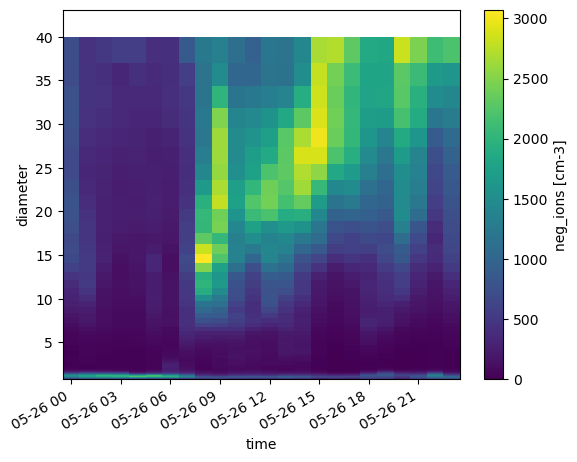

In [43]:
neg_ions.sel(time='2024-05-26').T.plot()

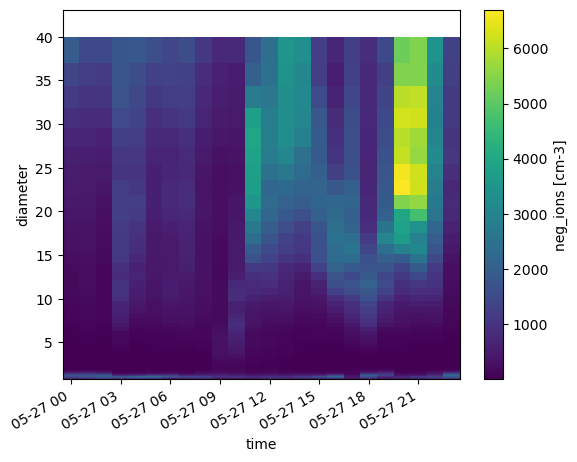

In [44]:
neg_ions.sel(time='2024-05-27').T.plot()

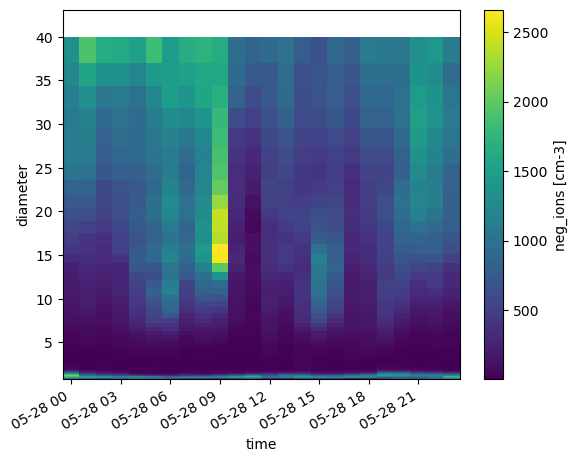

In [45]:
neg_ions.sel(time='2024-05-28').T.plot()

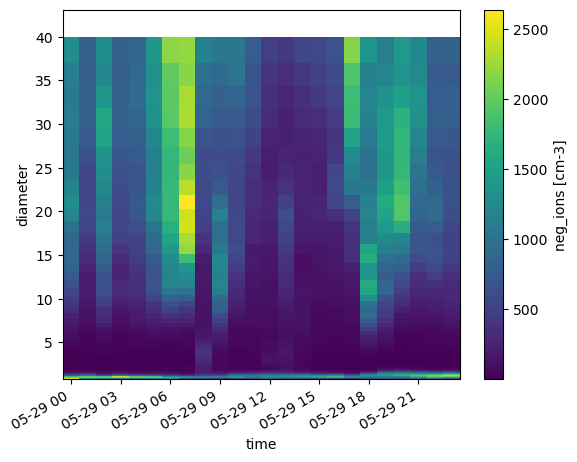

In [46]:
neg_ions.sel(time='2024-05-29').T.plot()

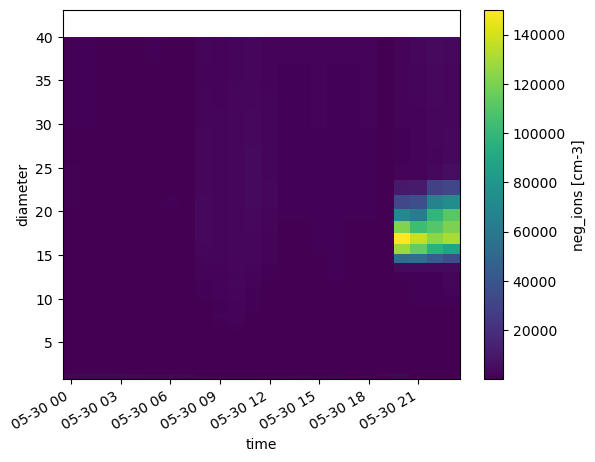

In [47]:
neg_ions.sel(time='2024-05-30').T.plot()

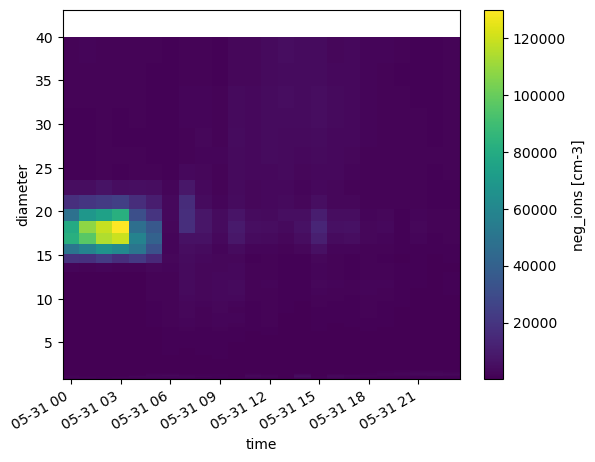

In [48]:
neg_ions.sel(time='2024-05-31').T.plot()

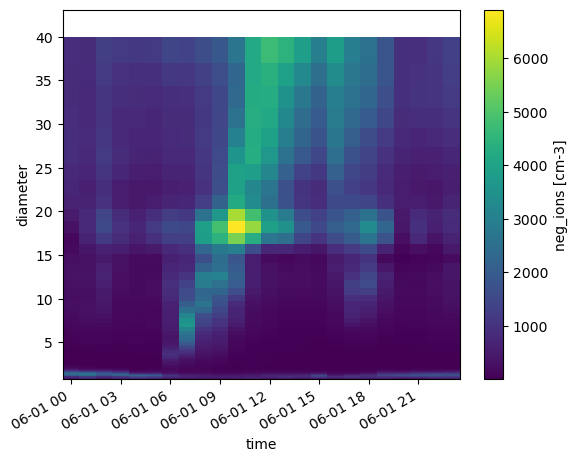

In [49]:
neg_ions.sel(time='2024-06-01').T.plot()

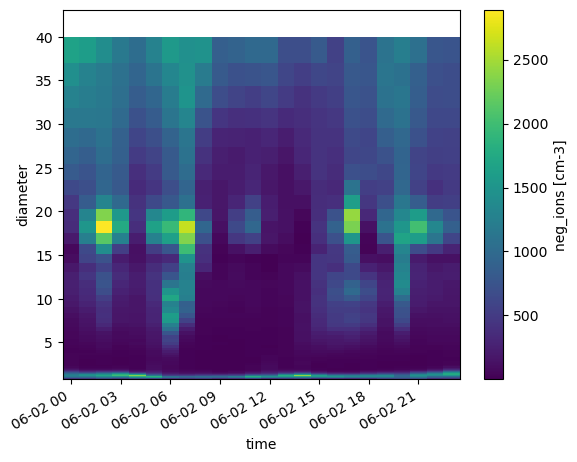

In [50]:
neg_ions.sel(time='2024-06-02').T.plot()

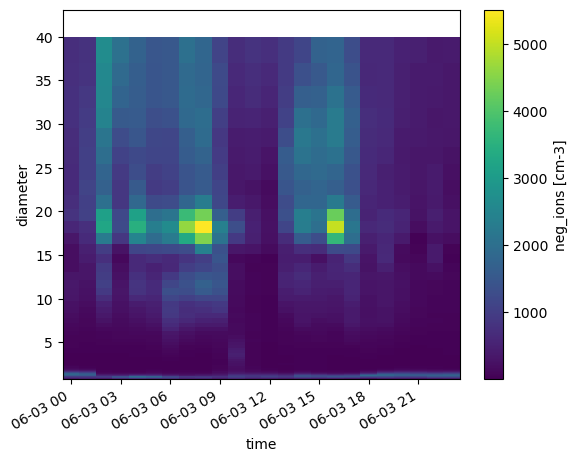

In [51]:
neg_ions.sel(time='2024-06-03').T.plot()

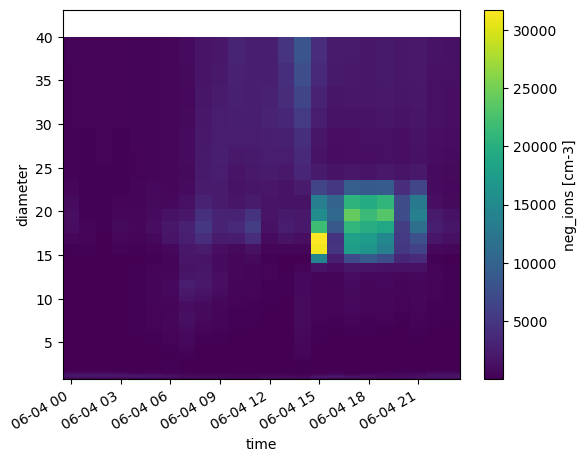

In [52]:
neg_ions.sel(time='2024-06-04').T.plot()

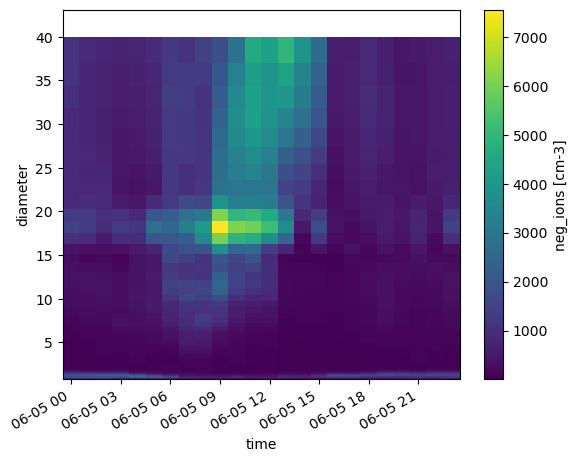

In [53]:
neg_ions.sel(time='2024-06-05').T.plot()

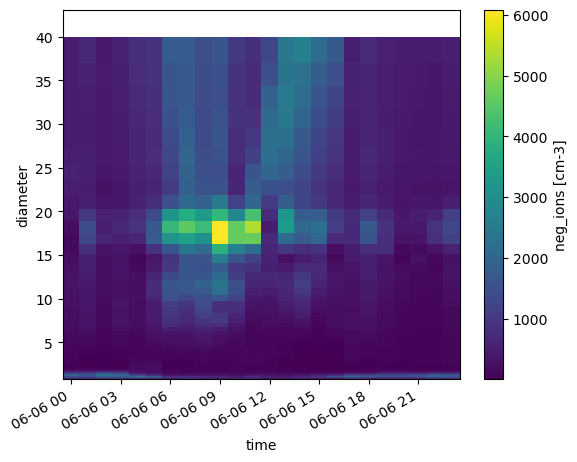

In [54]:
neg_ions.sel(time='2024-06-06').T.plot()

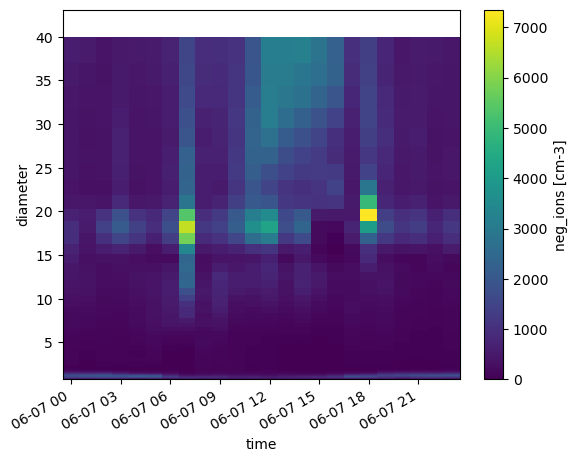

In [55]:
neg_ions.sel(time='2024-06-07').T.plot()

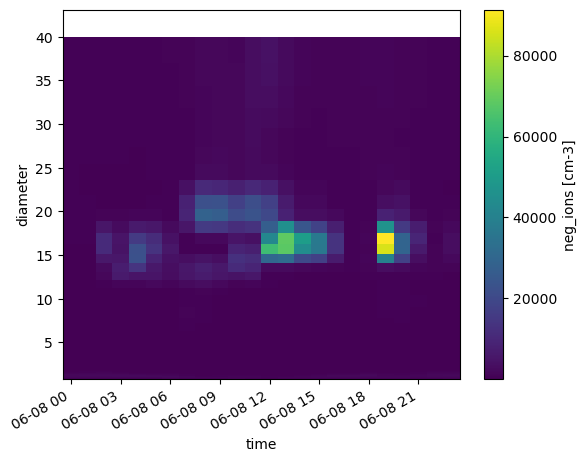

In [56]:
neg_ions.sel(time='2024-06-08').T.plot()

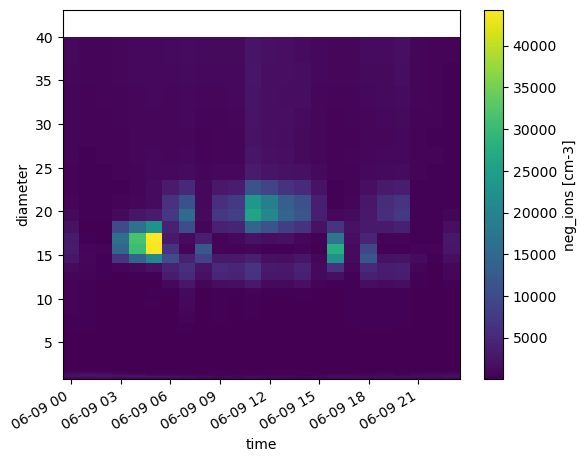

In [57]:
neg_ions.sel(time='2024-06-09').T.plot()

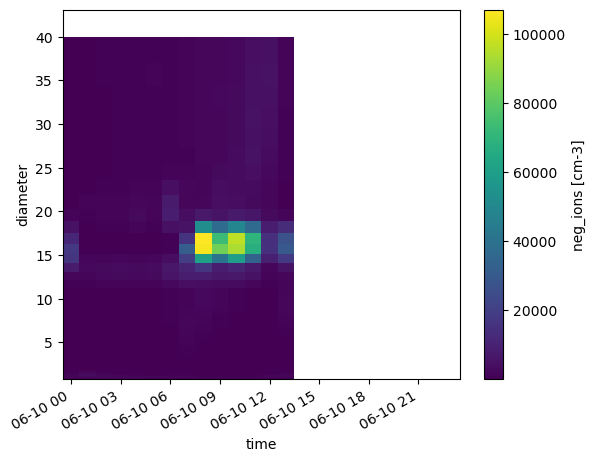

In [58]:
neg_ions.sel(time='2024-06-10').T.plot()

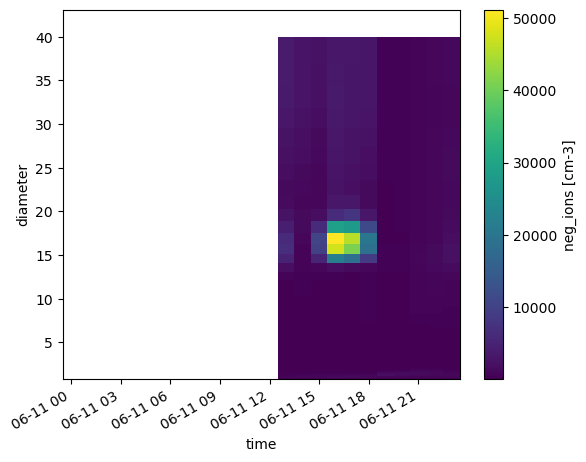

In [59]:
neg_ions.sel(time='2024-06-11').T.plot()

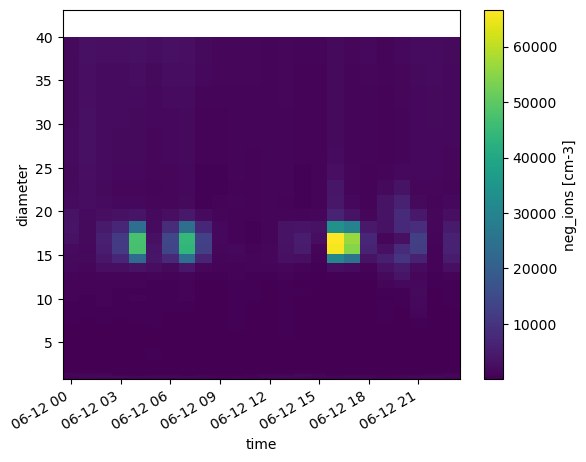

In [60]:
neg_ions.sel(time='2024-06-12').T.plot()

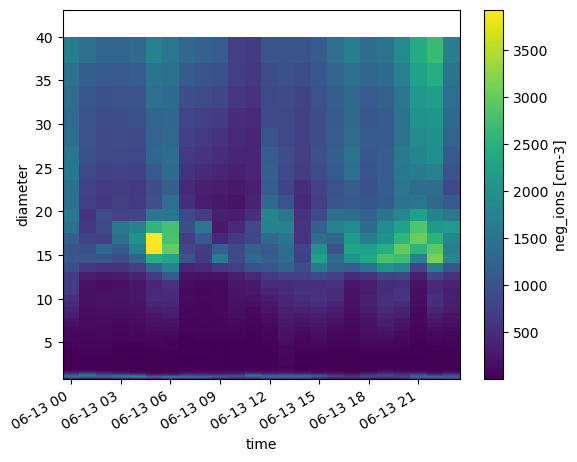

In [61]:
neg_ions.sel(time='2024-06-13').T.plot()

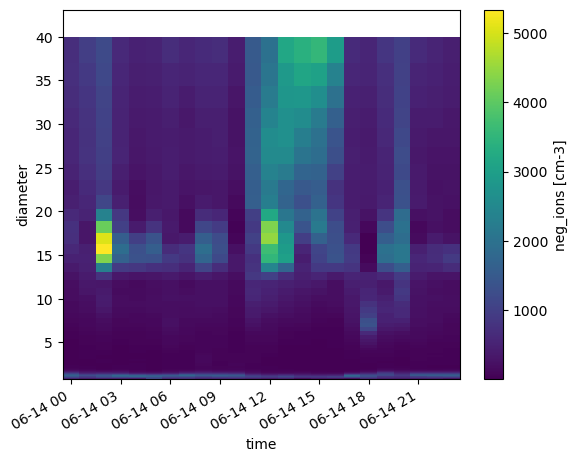

In [62]:
neg_ions.sel(time='2024-06-14').T.plot()

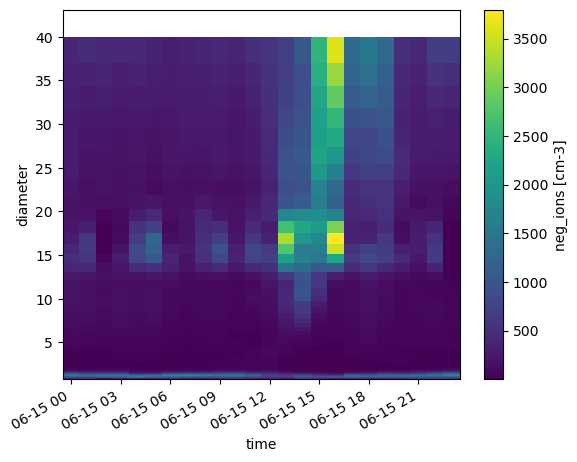

In [63]:
neg_ions.sel(time='2024-06-15').T.plot()

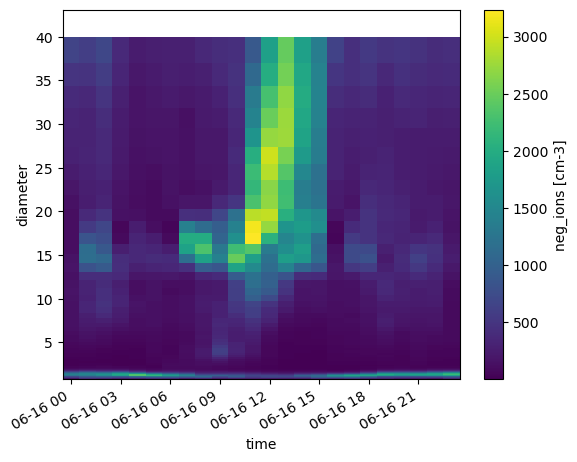

In [64]:
neg_ions.sel(time='2024-06-16').T.plot()

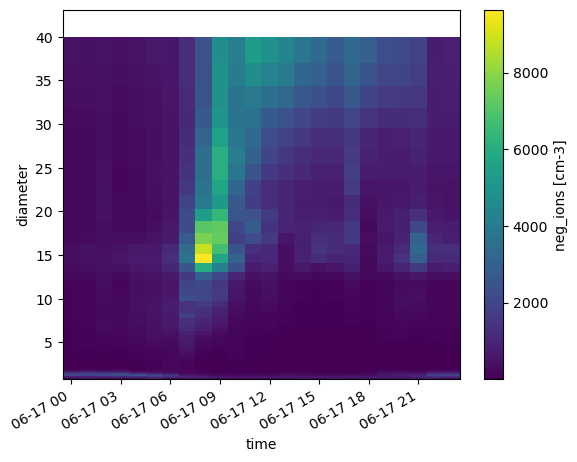

In [65]:
neg_ions.sel(time='2024-06-17').T.plot()

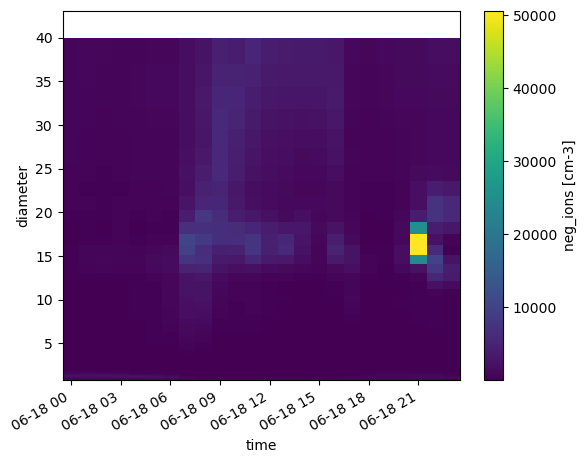

In [66]:
neg_ions.sel(time='2024-06-18').T.plot()

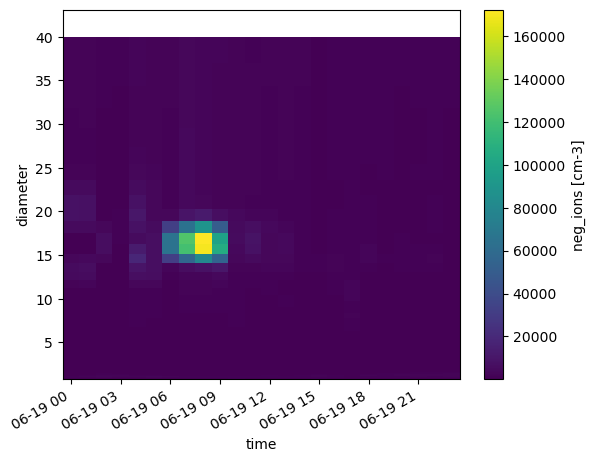

In [67]:
neg_ions.sel(time='2024-06-19').T.plot()

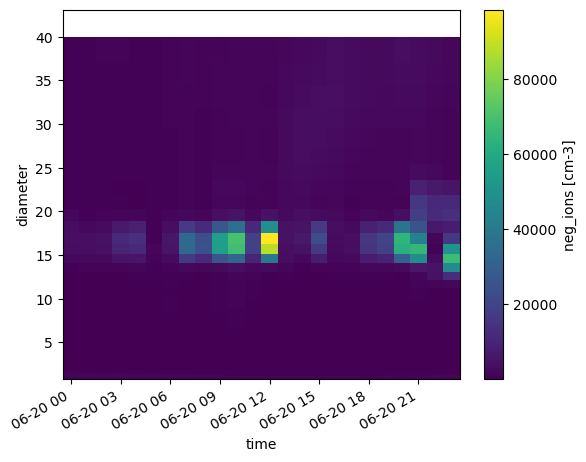

In [68]:
neg_ions.sel(time='2024-06-20').T.plot()

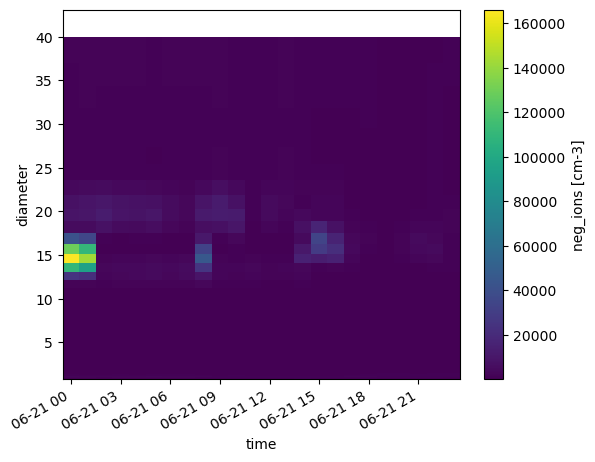

In [69]:
neg_ions.sel(time='2024-06-21').T.plot()

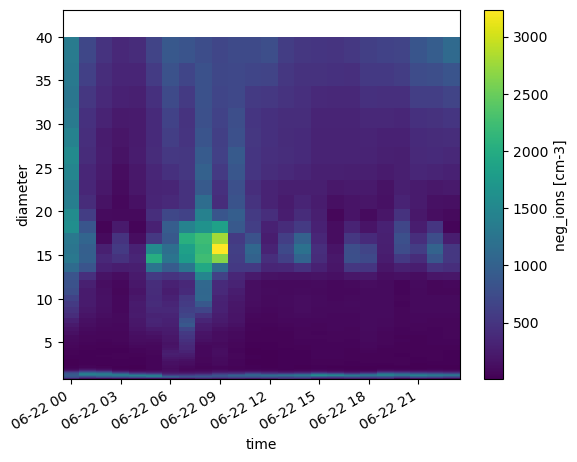

In [70]:
neg_ions.sel(time='2024-06-22').T.plot()

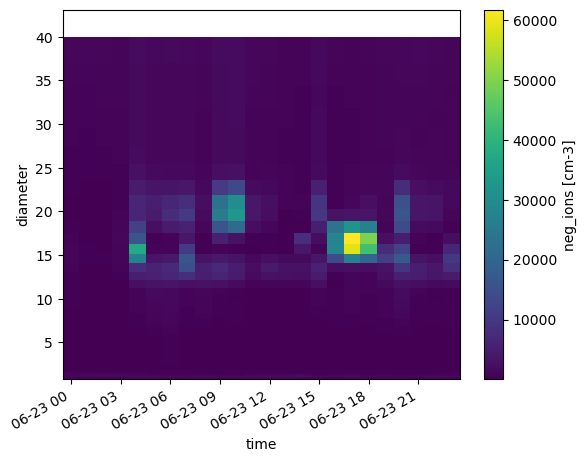

In [71]:
neg_ions.sel(time='2024-06-23').T.plot()

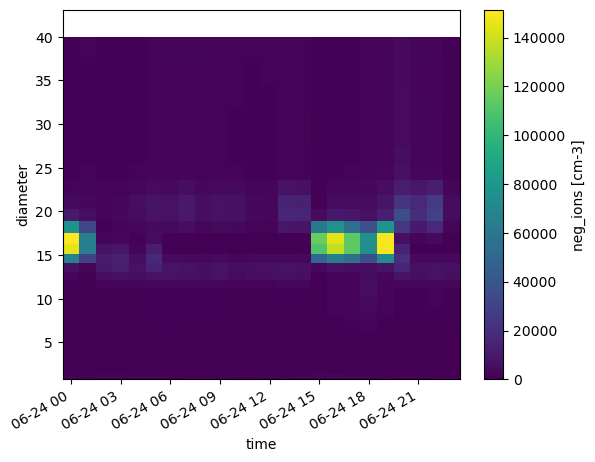

In [72]:
neg_ions.sel(time='2024-06-24').T.plot()

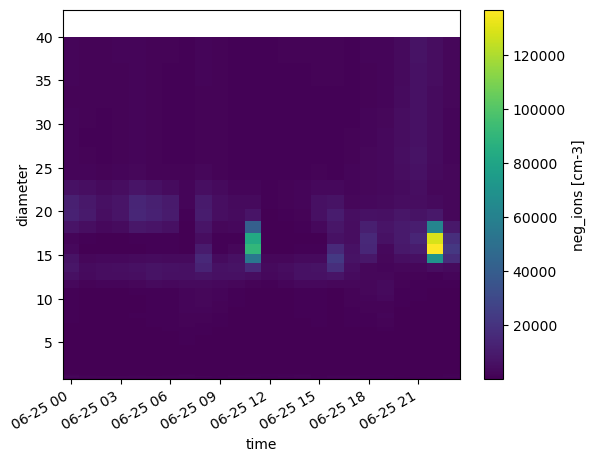

In [73]:
neg_ions.sel(time='2024-06-25').T.plot()

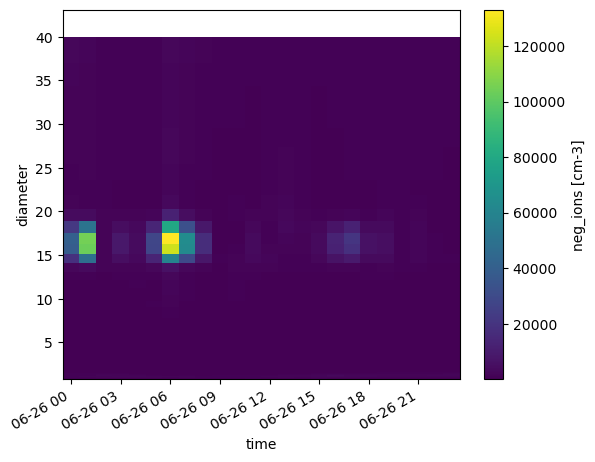

In [74]:
neg_ions.sel(time='2024-06-26').T.plot()

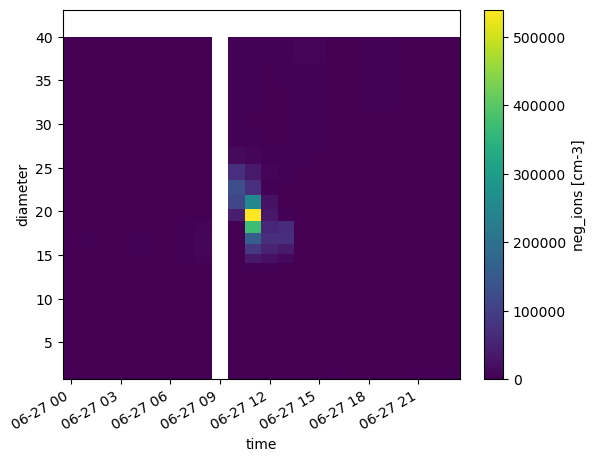

In [75]:
neg_ions.sel(time='2024-06-27').T.plot()

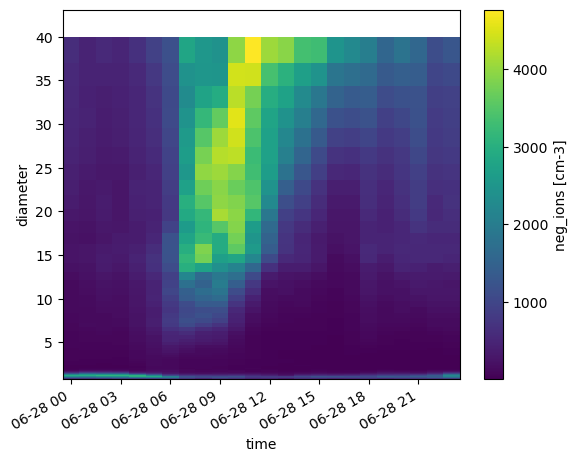

In [76]:
neg_ions.sel(time='2024-06-28').T.plot()

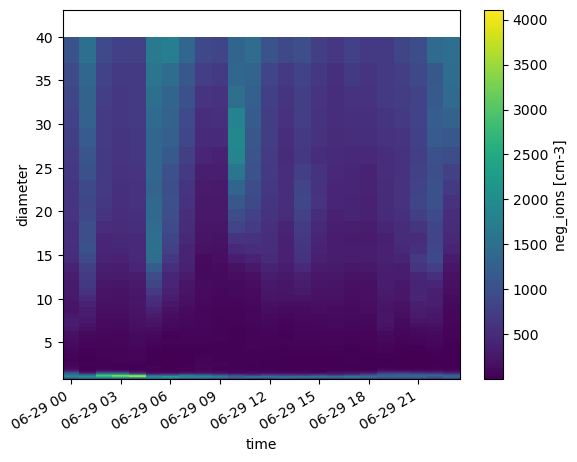

In [77]:
neg_ions.sel(time='2024-06-29').T.plot()

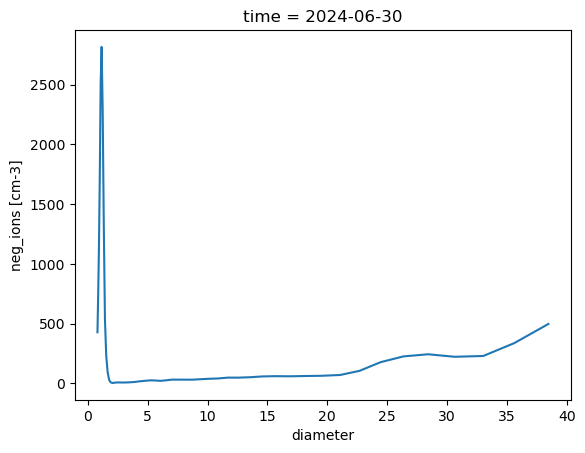

In [78]:
neg_ions.sel(time='2024-06-30').T.plot()

#### From the above spectral plots, I identified manually:
    1. NPF-event days -> 14 days
    2. Undefined -> 13 days
    3. Non-event days -> 19 days

In [79]:
npf_days=('2024-05-18','2024-05-19','2024-05-21','2024-05-22','2024-05-26','2024-06-01','2024-06-05','2024-06-06','2024-06-07','2024-06-14','2024-06-15','2024-06-16','2024-06-17','2024-06-28')
undef = ('2024-05-16','2024-05-23','2024-05-24','2024-05-25','2024-05-27','2024-05-28','2024-05-29','2024-06-02','2024-06-03','2024-06-13','2024-06-22','2024-06-29','2024-06-30')
nonevent = ('2024-05-17','2024-05-20','2024-05-30','2024-05-31','2024-06-04','2024-06-08','2024-06-09','2024-06-10','2024-06-11','2024-06-12','2024-06-18','2024-06-19','2024-06-20','2024-06-21','2024-06-23','2024-06-24','2024-06-25','2024-06-26','2024-06-27')

In [80]:
# dates from the days data (ignoring the time part)
unique_dates0 = pd.to_datetime(npf_days).normalize()
unique_dates1 = pd.to_datetime(undef).normalize()
unique_dates2 = pd.to_datetime(nonevent).normalize()

In [81]:
# Create a condition to filter the monthly data for these dates
condition0 = neg_ions.time.dt.floor('D').isin(unique_dates0)
condition1 = neg_ions.time.dt.floor('D').isin(unique_dates1)
condition2 = neg_ions.time.dt.floor('D').isin(unique_dates2)

# Filter the monthly data
npf_event = neg_ions.where(condition0, drop=True)
undefined = neg_ions.where(condition1, drop=True)
non_event = neg_ions.where(condition2, drop=True)

In [82]:
npf_event

<xarray.DataArray 'neg_ions' (time: 336, diameter: 55)>
array([[ 477.25713068,  662.44014005,  786.67562837, ...,  677.03498451,
         764.56212362,           nan],
       [ 511.51396604,  662.76044839,  704.47414143, ..., 1044.02039517,
        1074.7944015 ,           nan],
       [ 452.30507803,  635.01821568,  798.29772853, ...,  729.94769787,
         731.98196197,           nan],
       ...,
       [ 451.18336875,  701.37181262,  925.00213973, ..., 1383.96829165,
        1567.93611232,           nan],
       [ 392.68409956,  736.28006341, 1069.62349169, ...,  981.07695618,
        1115.41047537,           nan],
       [ 515.338892  ,  842.99971463, 1285.64502478, ..., 1060.85038361,
        1272.81176273,           nan]])
Coordinates:
  * diameter  (diameter) float64 0.8029 0.8628 0.9273 ... 35.61 38.46 41.55
  * time      (time) datetime64[ns] 2024-05-18 ... 2024-06-28T23:00:00
Attributes:
    units:        cm-3
    description:  Negative ion number-size distribution (dN/dlogDp)

In [83]:
undefined

<xarray.DataArray 'neg_ions' (time: 289, diameter: 55)>
array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       ...,
       [ 319.16842128,  576.25318151,  811.83706813, ..., 1115.13202962,
        1399.94144341,           nan],
       [ 417.30305328,  684.91809704,  998.64522543, ..., 1450.28229058,
        1462.18988711,           nan],
       [ 428.38607333,  740.36086594, 1139.6123975 , ...,  336.95982052,
         497.59167879,           nan]])
Coordinates:
  * diameter  (diameter) float64 0.8029 0.8628 0.9273 ... 35.61 38.46 41.55
  * time      (time) datetime64[ns] 2024-05-16 ... 2024-06-30
Attributes:
    units:        cm-3
    description:  Negative ion number-size distribution (dN/dlogDp)

In [84]:
non_event

<xarray.DataArray 'neg_ions' (time: 456, diameter: 55)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [322.02117657, 533.08395981, 821.15963574, ..., 832.42720557,
        895.17233983,          nan],
       [253.01332298, 497.75654668, 871.85284605, ..., 681.88972237,
        750.74361948,          nan],
       [412.18641276, 685.05619163, 982.07397602, ..., 576.79278743,
        655.87419229,          nan]])
Coordinates:
  * diameter  (diameter) float64 0.8029 0.8628 0.9273 ... 35.61 38.46 41.55
  * time      (time) datetime64[ns] 2024-05-17 ... 2024-06-27T23:00:00
Attributes:
    units:        cm-3
    description:  Negative ion number-size distribution (dN/dlogDp)

the mean diurnal cycles of meteorological variables during NPF event, undefined, and non–NPF event days

the mean diurnal cycles of small, intermediate, and large charged particles on NPF event, undefined, and non–NPF event days

the mean diurnal cycles of black carbon (BC), sulphuric acid (H2SO4) dimer, and condensation sink (CS) concentrations on NPF event, undefined, and non–NPF event days

In [85]:
met_data = pd.read_csv('/home/coliewo/Desktop/analysis/NPF/ions.ipynb (merge).csv')

In [86]:
met_data = met_data.set_index('time')

In [87]:
met_data.index = pd.to_datetime(met_data.index)  #make sure the index is datetime format

In [88]:
# Filter data for the selected dates for each 
df_npf = met_data[met_data.index.floor('D').isin(unique_dates0)]
df_undef = met_data[met_data.index.floor('D').isin(unique_dates1)]
df_nonevent = met_data[met_data.index.floor('D').isin(unique_dates2)]

In [89]:
df_nonevent

,small_neg_ions,small_pos_ions,intermediate_neg_ions,intermediate_pos_ions,large_neg_ions,large_pos_ions,T_air[C],RH[%%],Rain_acc[mm],WD_ave[Deg],WS_ave[m/s]
time,,,,,,,,,,,
2024-05-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,14.9,68.9,0.0,178.1,1.7
2024-05-17 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,15.7,57.8,0.0,183.0,2.7
2024-05-17 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,15.4,56.7,0.0,194.6,1.8
2024-05-17 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,14.0,66.5,0.0,191.6,1.5
2024-05-17 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,12.5,74.9,0.0,23.5,0.3
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-27 19:00:00,1752.758993,1513.965498,81.387606,4.022815,254.788453,110.918762,23.4,52.8,0.0,194.1,1.4
2024-06-27 20:00:00,1770.686196,1598.380576,78.443220,3.351952,241.458580,92.310905,22.9,54.2,0.0,189.7,3.1
2024-06-27 21:00:00,1740.955480,1550.891900,112.862549,10.474764,341.969030,176.442245,22.7,55.0,0.0,198.9,2.8


In [90]:
# Compute mean diurnal cycle for temp
npf_tmean_diurnal = df_npf.groupby(df_npf.index.hour)['T_air[C]'].mean()
undef_tmean_diurnal = df_undef.groupby(df_undef.index.hour)['T_air[C]'].mean()
nonevent_tmean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['T_air[C]'].mean()

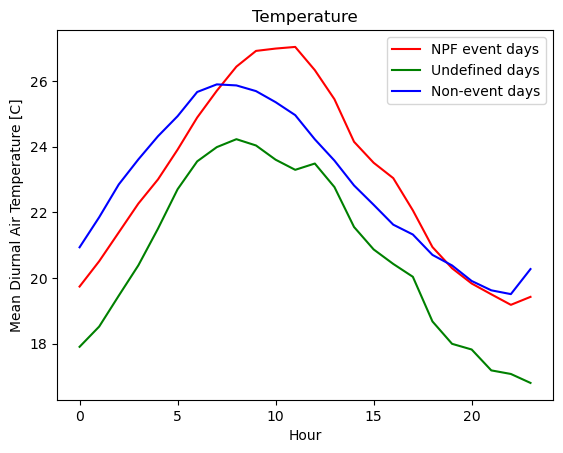

In [91]:
# Plotting all the curves simultaneously 
plt.plot(npf_tmean_diurnal.index, npf_tmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_tmean_diurnal.index, undef_tmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_tmean_diurnal.index, nonevent_tmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Diurnal Air Temperature [C]')
plt.title('Temperature')

plt.legend()
plt.show()

In [92]:
# Compute mean diurnal cycle for Relative Humidity
npf_rhmean_diurnal = df_npf.groupby(df_npf.index.hour)['RH[%%]'].mean()
undef_rhmean_diurnal = df_undef.groupby(df_undef.index.hour)['RH[%%]'].mean()
nonevent_rhmean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['RH[%%]'].mean()

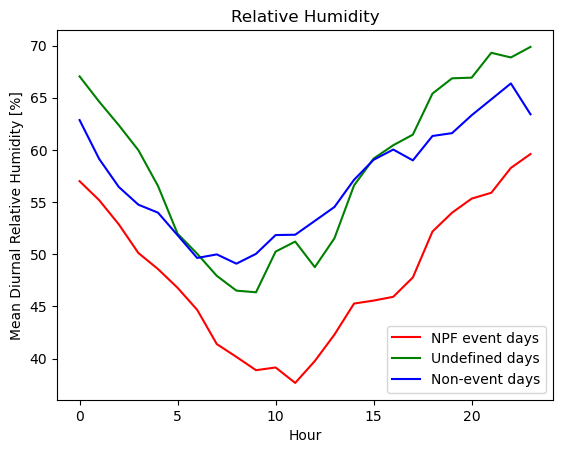

In [93]:
# Plotting all the curves simultaneously 
plt.plot(npf_rhmean_diurnal.index, npf_rhmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_rhmean_diurnal.index, undef_rhmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_rhmean_diurnal.index, nonevent_rhmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Diurnal Relative Humidity [%]')
plt.title('Relative Humidity')

plt.legend()
plt.show()

In [94]:
# Compute mean diurnal cycle for Wind speed
npf_wsmean_diurnal = df_npf.groupby(df_npf.index.hour)['WS_ave[m/s]'].mean()
undef_wsmean_diurnal = df_undef.groupby(df_undef.index.hour)['WS_ave[m/s]'].mean()
nonevent_wsmean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['WS_ave[m/s]'].mean()

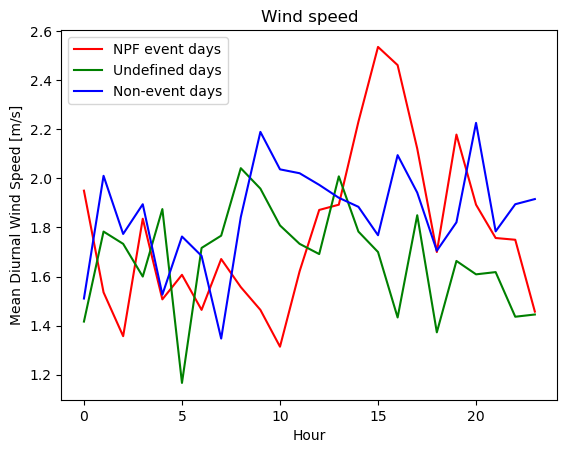

In [95]:
# Plotting all the curves simultaneously 
plt.plot(npf_wsmean_diurnal.index, npf_wsmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_wsmean_diurnal.index, undef_wsmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_wsmean_diurnal.index, nonevent_wsmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Diurnal Wind Speed [m/s]')
plt.title('Wind speed')

plt.legend()
plt.show()

In [96]:
# Compute mean diurnal cycle for Small Negative Ion Concentration
npf_snmean_diurnal = df_npf.groupby(df_npf.index.hour)['small_neg_ions'].mean()
undef_snmean_diurnal = df_undef.groupby(df_undef.index.hour)['small_neg_ions'].mean()
nonevent_snmean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['small_neg_ions'].mean()

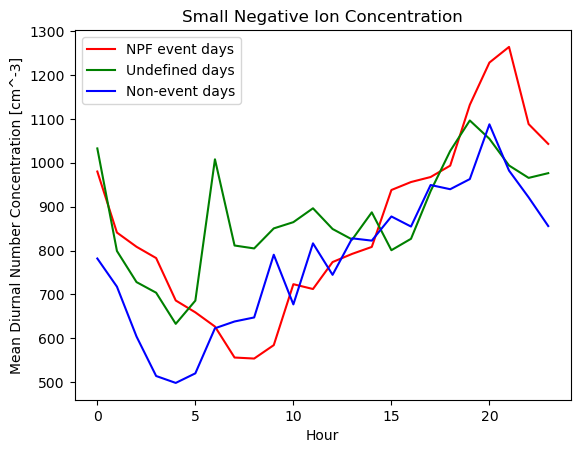

In [97]:
# Plotting all the curves simultaneously 
plt.plot(npf_snmean_diurnal.index, npf_snmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_snmean_diurnal.index, undef_snmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_snmean_diurnal.index, nonevent_snmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Diurnal Number Concentration [cm^-3]')
plt.title('Small Negative Ion Concentration')

plt.legend()
plt.show()

In [98]:
# Compute mean diurnal cycle for Small Positive Ion Concentration
npf_spmean_diurnal = df_npf.groupby(df_npf.index.hour)['small_pos_ions'].mean()
undef_spmean_diurnal = df_undef.groupby(df_undef.index.hour)['small_pos_ions'].mean()
nonevent_spmean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['small_pos_ions'].mean()

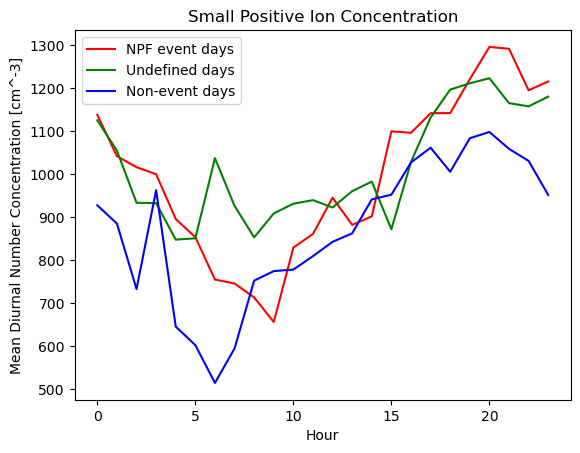

In [99]:
# Plotting all the curves simultaneously 
plt.plot(npf_spmean_diurnal.index, npf_spmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_spmean_diurnal.index, undef_spmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_spmean_diurnal.index, nonevent_spmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Diurnal Number Concentration [cm^-3]')
plt.title('Small Positive Ion Concentration')

plt.legend()
plt.show()

In [100]:
# Compute mean diurnal cycle for Intermediate Negative Ion Concentration
npf_inmean_diurnal = df_npf.groupby(df_npf.index.hour)['intermediate_neg_ions'].mean()
undef_inmean_diurnal = df_undef.groupby(df_undef.index.hour)['intermediate_neg_ions'].mean()
nonevent_inmean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['intermediate_neg_ions'].mean()

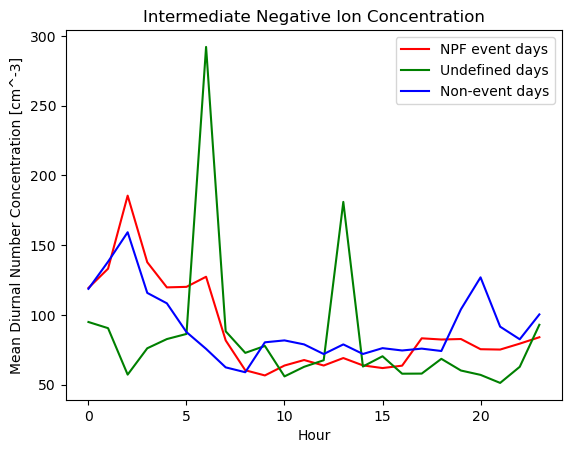

In [101]:
# Plotting all the curves simultaneously 
plt.plot(npf_inmean_diurnal.index, npf_inmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_inmean_diurnal.index, undef_inmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_inmean_diurnal.index, nonevent_inmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Diurnal Number Concentration [cm^-3]')
plt.title('Intermediate Negative Ion Concentration')

plt.legend()
plt.show()

In [102]:
# Compute mean diurnal cycle for Intermediate Positive Ion Concentration
npf_ipmean_diurnal = df_npf.groupby(df_npf.index.hour)['intermediate_pos_ions'].mean()
undef_ipmean_diurnal = df_undef.groupby(df_undef.index.hour)['intermediate_pos_ions'].mean()
nonevent_ipmean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['intermediate_pos_ions'].mean()

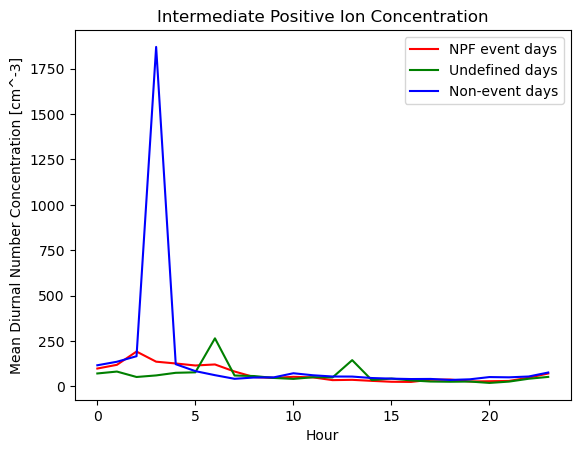

In [103]:
# Plotting all the curves simultaneously 
plt.plot(npf_ipmean_diurnal.index, npf_ipmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_ipmean_diurnal.index, undef_ipmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_ipmean_diurnal.index, nonevent_ipmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Diurnal Number Concentration [cm^-3]')
plt.title('Intermediate Positive Ion Concentration')

plt.legend()
plt.show()

In [104]:
# Compute mean diurnal cycle for Large Negative Ion Concentration
npf_lnmean_diurnal = df_npf.groupby(df_npf.index.hour)['large_neg_ions'].mean()
undef_lnmean_diurnal = df_undef.groupby(df_undef.index.hour)['large_neg_ions'].mean()
nonevent_lnmean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['large_neg_ions'].mean()

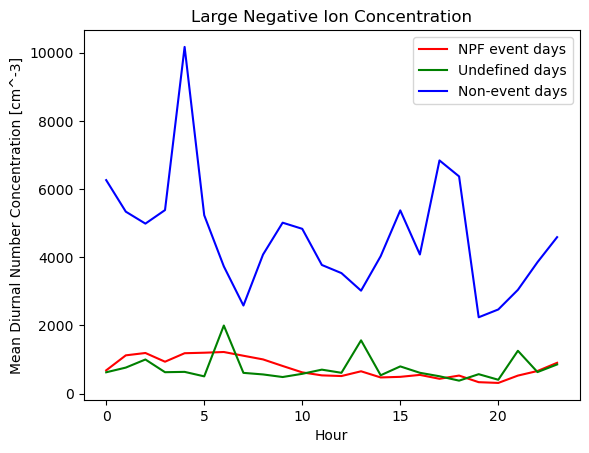

In [105]:
# Plotting all the curves simultaneously 
plt.plot(npf_lnmean_diurnal.index, npf_lnmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_lnmean_diurnal.index, undef_lnmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_lnmean_diurnal.index, nonevent_lnmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Diurnal Number Concentration [cm^-3]')
plt.title('Large Negative Ion Concentration')

plt.legend()
plt.show()

In [106]:
# Compute mean diurnal cycle for Large Positive Ion Concentration
npf_lpmean_diurnal = df_npf.groupby(df_npf.index.hour)['large_pos_ions'].mean()
undef_lpmean_diurnal = df_undef.groupby(df_undef.index.hour)['large_pos_ions'].mean()
nonevent_lpmean_diurnal = df_nonevent.groupby(df_nonevent.index.hour)['large_pos_ions'].mean()

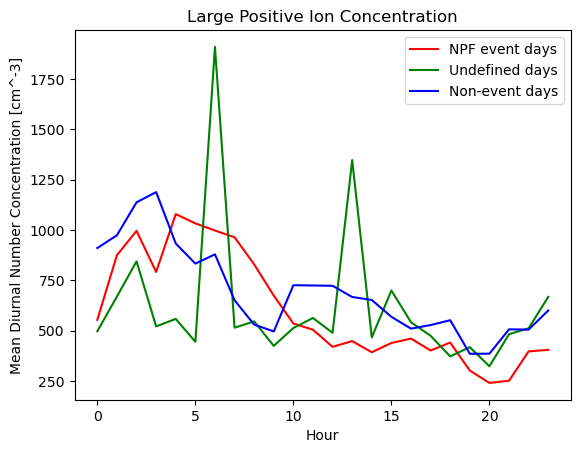

In [107]:
# Plotting all the curves simultaneously 
plt.plot(npf_lpmean_diurnal.index, npf_lpmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_lpmean_diurnal.index, undef_lpmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_lpmean_diurnal.index, nonevent_lpmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Diurnal Number Concentration [cm^-3]')
plt.title('Large Positive Ion Concentration')

plt.legend()
plt.show()

#### Add the NO and ozone data

In [108]:
ozone_data = pd.read_csv('/home/coliewo/Desktop/analysis/NPF/combo.ipynb (ozone2).csv')
no_data = pd.read_csv('/home/coliewo/Desktop/analysis/NPF/combo.ipynb (no2).csv')

In [109]:
no_data

,Date,NO[ppb],NO2[ppb],NOx[ppb]
0,2024-05-01 00:00:00,0.639,6.796,7.435
1,2024-05-01 00:01:00,0.668,6.813,7.481
2,2024-05-01 00:02:00,0.691,6.816,7.507
3,2024-05-01 00:03:00,0.705,6.913,7.618
4,2024-05-01 00:04:00,0.705,6.957,7.662
...,...,...,...,...
86490,2024-06-30 23:55:00,NaN,0.041,NaN
86491,2024-06-30 23:56:00,NaN,0.043,NaN
86492,2024-06-30 23:57:00,NaN,0.050,NaN
86493,2024-06-30 23:58:00,NaN,0.057,NaN


In [110]:
no_data = no_data.set_index('Date')
no_data.index = pd.to_datetime(no_data.index)  #make sure the index is datetime format
# Filter data for the selected dates for each 
no_npf = no_data[no_data.index.floor('D').isin(unique_dates0)]
no_undef = no_data[no_data.index.floor('D').isin(unique_dates1)]
no_nonevent = no_data[no_data.index.floor('D').isin(unique_dates2)]

In [111]:
ozone_data = ozone_data.set_index('Date')
ozone_data.index = pd.to_datetime(ozone_data.index)  #make sure the index is datetime format
# Filter data for the selected dates for each 
o3_npf = ozone_data[ozone_data.index.floor('D').isin(unique_dates0)]
o3_undef = ozone_data[ozone_data.index.floor('D').isin(unique_dates1)]
o3_nonevent = ozone_data[ozone_data.index.floor('D').isin(unique_dates2)]

In [112]:
# Compute mean diurnal cycle for NO
npf_nomean_diurnal = no_npf.groupby(no_npf.index.hour)['NO[ppb]'].mean()
undef_nomean_diurnal = no_undef.groupby(no_undef.index.hour)['NO[ppb]'].mean() 
nonevent_nomean_diurnal = no_nonevent.groupby(no_nonevent.index.hour)['NO[ppb]'].mean()

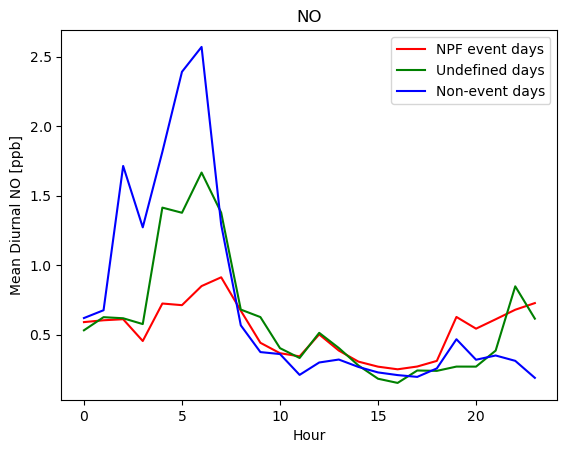

In [113]:
# Plotting all the curves simultaneously 
plt.plot(npf_nomean_diurnal.index, npf_nomean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_nomean_diurnal.index, undef_nomean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_nomean_diurnal.index, nonevent_nomean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Diurnal NO [ppb]')
plt.title('NO')

plt.legend()
plt.show()

In [114]:
# Compute mean diurnal cycle for NO2
npf_no2mean_diurnal = no_npf.groupby(no_npf.index.hour)['NO2[ppb]'].mean()
undef_no2mean_diurnal = no_undef.groupby(no_undef.index.hour)['NO2[ppb]'].mean() 
nonevent_no2mean_diurnal = no_nonevent.groupby(no_nonevent.index.hour)['NO2[ppb]'].mean()

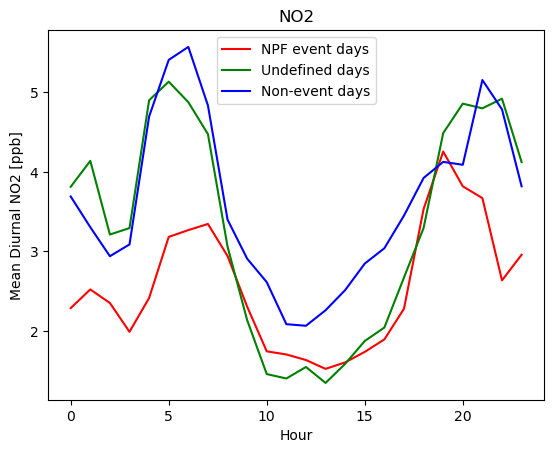

In [115]:
# Plotting all the curves simultaneously 
plt.plot(npf_no2mean_diurnal.index, npf_no2mean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_no2mean_diurnal.index, undef_no2mean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_no2mean_diurnal.index, nonevent_no2mean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Diurnal NO2 [ppb]')
plt.title('NO2')

plt.legend()
plt.show()

In [116]:
# Compute mean diurnal cycle for NOx
npf_noxmean_diurnal = no_npf.groupby(no_npf.index.hour)['NOx[ppb]'].mean()
undef_noxmean_diurnal = no_undef.groupby(no_undef.index.hour)['NOx[ppb]'].mean() 
nonevent_noxmean_diurnal = no_nonevent.groupby(no_nonevent.index.hour)['NOx[ppb]'].mean()

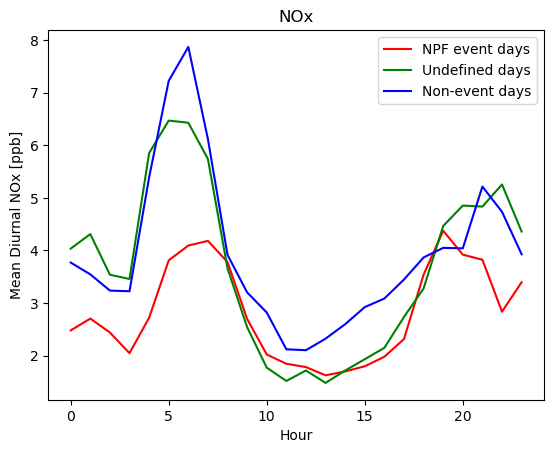

In [117]:
# Plotting all the curves simultaneously 
plt.plot(npf_noxmean_diurnal.index, npf_noxmean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_noxmean_diurnal.index, undef_noxmean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_noxmean_diurnal.index, nonevent_noxmean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Diurnal NOx [ppb]')
plt.title('NOx')

plt.legend()
plt.show()

In [118]:
# Compute mean diurnal cycle for NOx
npf_o3mean_diurnal = o3_npf.groupby(o3_npf.index.hour)['O3'].mean()
undef_o3mean_diurnal = o3_undef.groupby(o3_undef.index.hour)['O3'].mean() 
nonevent_o3mean_diurnal = o3_nonevent.groupby(o3_nonevent.index.hour)['O3'].mean()

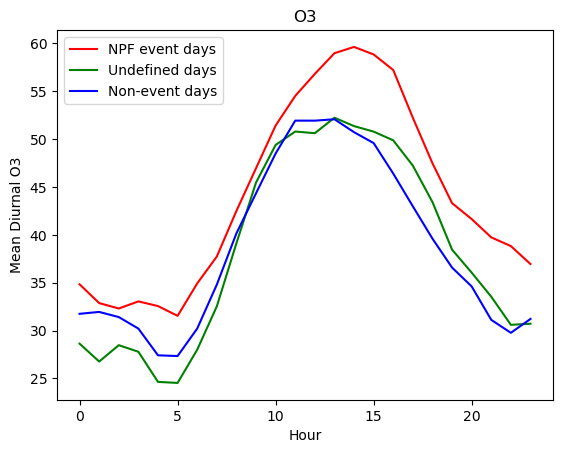

In [119]:
# Plotting all the curves simultaneously 
plt.plot(npf_o3mean_diurnal.index, npf_o3mean_diurnal, color='r', label='NPF event days') 
plt.plot(undef_o3mean_diurnal.index, undef_o3mean_diurnal, color='g', label='Undefined days') 
plt.plot(nonevent_o3mean_diurnal.index, nonevent_o3mean_diurnal, color='b', label='Non-event days')

plt.xlabel('Hour') 
plt.ylabel('Mean Diurnal O3')
plt.title('O3')

plt.legend()
plt.show()

### Condensation Sink

In [ ]:
import numpy as np

# Define constants (example values)
D = 0.05  # Diffusion coefficient in cm^2/s, example value for H2SO4
d = np.array([...])  # Array of particle diameters in cm
N = np.array([...])  # Array of particle number concentrations corresponding to diameters

# Define the Fuchs-Sutugin correction factor
def fuchs_sutugin_factor(diameter):
    # Example calculation, adjust according to the condensing vapor
    Kn = 2 * D / (diameter * v_mean)  # Knudsen number
    alpha = 1.0  # Accomodation coefficient, adjust based on vapor
    return (1 + Kn) / (1 + (1 + Kn) / (1 + 0.377 * Kn + 1.33 * Kn**2))

# Calculate the condensation sink
def calculate_cs(diameters, concentrations, D):
    v_mean = 300  # Mean molecular speed of vapor, example value in m/s
    beta = np.array([fuchs_sutugin_factor(d) for d in diameters])
    cs = 2 * np.pi * D * np.sum(beta * diameters * concentrations)
    return cs

# Calculate CS for your data
cs_value = calculate_cs(d, N, D)

# Example categorization and analysis (simplified)
npf_event_days = [cs_value for day in npf_event_days_data]
non_npf_event_days = [cs_value for day in non_npf_event_days_data]
undefined_days = [cs_value for day in undefined_days_data]

average_cs_npf = np.mean(npf_event_days)
average_cs_non_npf = np.mean(non_npf_event_days)
average_cs_undefined = np.mean(undefined_days)

# Comparison
print(f"CS on NPF days: {average_cs_npf}")
print(f"CS on non-NPF days: {average_cs_non_npf}")
print(f"CS on undefined days: {average_cs_undefined}")


In [35]:
# Average neg_particles over the diameter dimension and convert to a pandas DataFrame
small_neg_ions = small_neg_ions.mean(dim='diameter').to_dataframe().reset_index()
small_neg_ions['time'] = pd.to_datetime(small_neg_ions['time'])
small_neg_ions_df = small_neg_ions.set_index('time')

# Statistical summary
small_neg_ions_df.describe()

,neg_ions
count,1007.000000
mean,827.414573
std,353.175334
min,191.757918
25%,567.277006
50%,795.184340
75%,1027.742091
max,4342.143601


In [38]:
# Average neg_particles over the diameter dimension and convert to a pandas DataFrame
small_pos_ions = small_pos_ions.mean(dim='diameter').to_dataframe().reset_index()
small_pos_ions['time'] = pd.to_datetime(small_pos_ions['time'])
small_pos_ions_df = small_pos_ions.set_index('time')

# Statistical summary
small_pos_ions_df.describe()

,pos_ions
count,1007.000000
mean,948.439478
std,373.906032
min,77.546723
25%,696.572720
50%,914.831419
75%,1177.181043
max,5131.277780


In [36]:
# Average neg_particles over the diameter dimension and convert to a pandas DataFrame
intermediate_neg_ions = intermediate_neg_ions.mean(dim='diameter').to_dataframe().reset_index()
intermediate_neg_ions['time'] = pd.to_datetime(intermediate_neg_ions['time'])
intermediate_neg_ions_df = intermediate_neg_ions.set_index('time')

# Statistical summary
intermediate_neg_ions_df.describe()

,neg_ions
count,1007.000000
mean,89.398177
std,125.067993
min,5.936368
25%,41.449638
50%,61.778435
75%,97.848207
max,2567.038970


In [39]:
# Average neg_particles over the diameter dimension and convert to a pandas DataFrame
intermediate_pos_ions = intermediate_pos_ions.mean(dim='diameter').to_dataframe().reset_index()
intermediate_pos_ions['time'] = pd.to_datetime(intermediate_pos_ions['time'])
intermediate_pos_ions_df = intermediate_pos_ions.set_index('time')

# Statistical summary
intermediate_pos_ions_df.describe()

,pos_ions
count,1007.000000
mean,94.687042
std,890.278657
min,-162.192623
25%,17.958367
50%,34.889410
75%,72.426970
max,28058.007909


In [37]:
# Average neg_particles over the diameter dimension and convert to a pandas DataFrame
large_neg_ions = large_neg_ions.mean(dim='diameter').to_dataframe().reset_index()
large_neg_ions['time'] = pd.to_datetime(large_neg_ions['time'])
large_neg_ions_df = large_neg_ions.set_index('time')

# Statistical summary
large_neg_ions_df.describe()

,neg_ions
count,1007.000000
mean,2338.416049
std,5792.397301
min,33.382587
25%,338.440074
50%,675.154164
75%,1665.997885
max,96688.503003


In [40]:
# Average neg_particles over the diameter dimension and convert to a pandas DataFrame
large_pos_ions = large_pos_ions.mean(dim='diameter').to_dataframe().reset_index()
large_pos_ions['time'] = pd.to_datetime(large_pos_ions['time'])
large_pos_ions_df = large_pos_ions.set_index('time')

# Statistical summary
large_pos_ions_df.describe()

,pos_ions
count,1007.000000
mean,644.226926
std,874.946686
min,2.148323
25%,240.620474
50%,432.037005
75%,779.234123
max,19028.169008


In [41]:
# Total
pos_ions = pos_ions.mean(dim='diameter').to_dataframe().reset_index()
pos_ions['time'] = pd.to_datetime(pos_ions['time'])
pos_ions_df = pos_ions.set_index('time')

# Statistical summary
pos_ions_df.describe()

,pos_ions
count,1007.000000
mean,578.882921
std,737.831209
min,70.484091
25%,367.861417
50%,468.042937
75%,645.657819
max,16799.728671


In [42]:
# Total
neg_ions = neg_ions.mean(dim='diameter').to_dataframe().reset_index()
neg_ions['time'] = pd.to_datetime(neg_ions['time'])
neg_ions_df = neg_ions.set_index('time')

# Statistical summary
neg_ions_df.describe()

,neg_ions
count,1007.000000
mean,1040.703782
std,1775.329141
min,89.739050
25%,411.771323
50%,548.151784
75%,903.357390
max,29380.797455


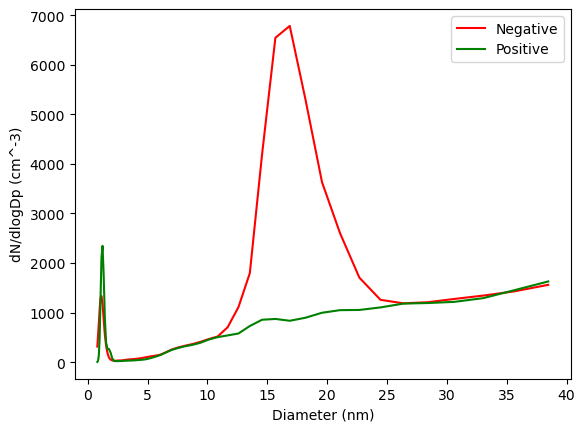

In [45]:
# Total particles dist over 
neg_i = dataset.neg_ions.mean(dim='time')
pos_i = dataset.pos_ions.mean(dim='time')

#plot
# Plotting both the curves simultaneously 
plt.plot(neg_i['diameter'], neg_i.values, color='r', label='Negative') 
plt.plot(pos_i['diameter'], pos_i.values, color='g', label='Positive') 

plt.xlabel('Diameter (nm)') 
plt.ylabel('dN/dlogDp (cm^-3)')

plt.legend()
plt.show()